<a href="https://colab.research.google.com/github/rexindustries/necesssary_visualizations/blob/master/Plot_Predictions_Test_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We will be using MNIST dataset for the visualizing 
# Take a look at the dataset

In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import matplotlib.pyplot as plt


In [11]:
# importing the dataset from keras datasets api
# feel free to explore it at - tensorflow hub datasets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [12]:
# the dataset has been divided to classify 10 classes as follows 
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel Boot']

# Normalizing the dataset
# Normalizing is necessary for both visualization and further for feeding the model
num_classes = len(classes) 
X_train, X_test = X_train/255.0, X_test/255.0
X_train_vis = X_train
X_test_vis = X_test
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))
# cannot explain the below two lines for explanation please go to -- https://github.com/hereiskunalverma/introduction_to_imageclassification
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes) 
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes) 

print('the training and test sets consists of following shape --> \n')
print('X_train.shape  --> ', X_train.shape)
print('X_test.shape   --> ', X_test.shape)
print('y_train.shape  --> ',y_train.shape)
print('y_test.shape   --> ', y_test.shape)

the training and test sets consists of following shape --> 

X_train.shape  -->  (60000, 28, 28, 1)
X_test.shape   -->  (10000, 28, 28, 1)
y_train.shape  -->  (60000, 10)
y_test.shape   -->  (10000, 10)


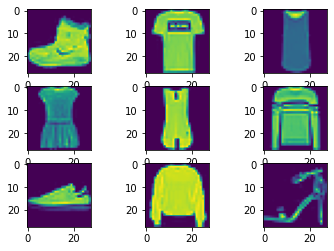

In [13]:
# plot images
images = 9
from matplotlib import pyplot
for i in range(images):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train_vis[i])
# show the figure
pyplot.show()

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [15]:
# compiling the model 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.99):
      print('\nReached 99% accuracy so cancelling training!')
      self.model.stop_training=True

callbacks = myCallback()

In [17]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[callbacks])

Epoch 1/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4388 - accuracy: 0.8404 - val_loss: 0.3517 - val_accuracy: 0.8697
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2906 - accuracy: 0.8928 - val_loss: 0.2780 - val_accuracy: 0.9001
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2466 - accuracy: 0.9102 - val_loss: 0.3006 - val_accuracy: 0.8926
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2161 - accuracy: 0.9198 - val_loss: 0.2470 - val_accuracy: 0.9114
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1903 - accuracy: 0.9289 - val_loss: 0.2525 - val_accuracy: 0.9090
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1660 - accuracy: 0.9378 - val_loss: 0.2545 - val_accuracy: 0.9102
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1472 - accuracy: 0.9443 - val_loss: 0.2660 - val_ac

In [18]:
import numpy as np
predicted_lab = model.predict(X_test)
predicted_lab = np.round(predicted_lab)
y_test_lis = y_test.tolist()
predicted_lab_lis = predicted_lab.tolist()

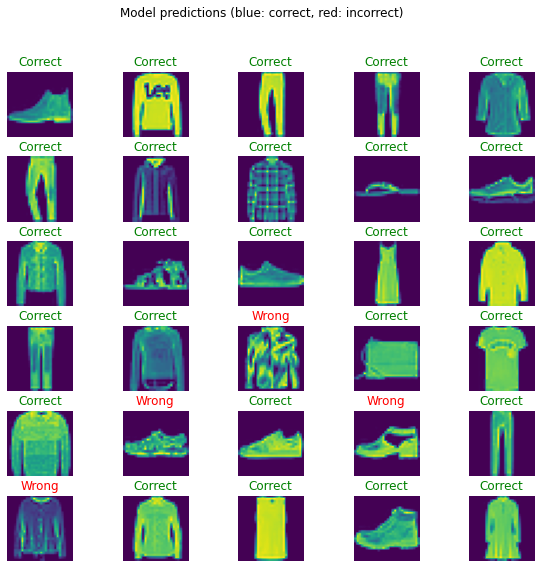

In [19]:
# Visualizing the predictions on the test set
image_batch = X_test_vis
plt.figure(figsize=(10,9))
images = 30 # no of predicted to show
for n in range(images):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "green" if predicted_lab_lis[n] == y_test_lis[n] else "red"
  if color=="green":
    plt.title("Correct", color=color)
  else:

    plt.title("Wrong", color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

# You can use this implementation for other of your datasets
# Feel free to modify to make it more robust